In [1]:
import pandas as pd
dataset=pd.read_csv("PrePlacement.csv")

In [2]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
#Gona merge quan and qual 


In [14]:
dataset['ssc_p'].dtypes

dtype('float64')

In [3]:
import seaborn as sns
#!pip install seaborn

C:\Users\Rajesh\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


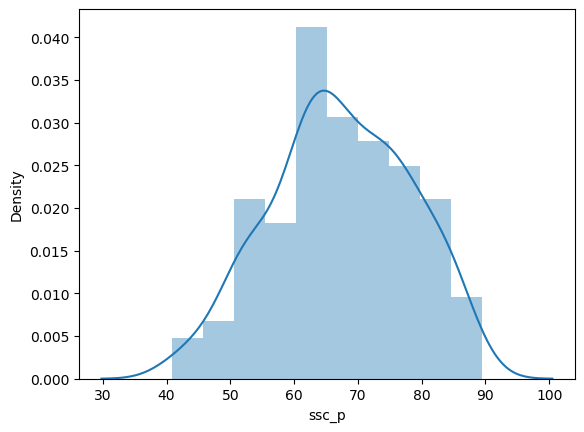

In [4]:
sns.distplot(dataset["ssc_p"])
#the edge is histogram and probability density #bell curve

In [5]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color ='black')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%3.f'%(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probabilities for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=67.303, Standard Deviation= 11
The area between range(60,70):0.3449514151280293


C:\Users\Rajesh\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


0.3449514151280293

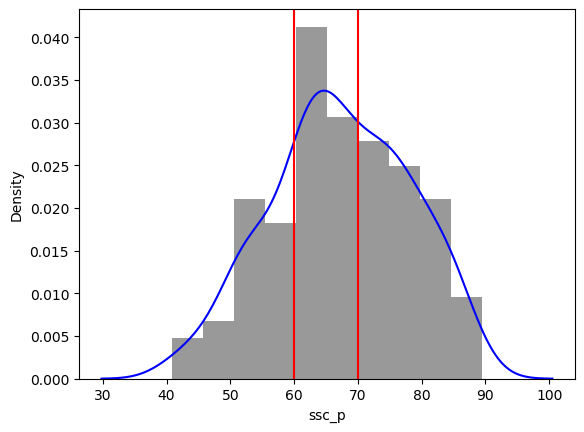

In [6]:
#to get the probability of Density Function
#34% prob
get_pdf_probability(dataset["ssc_p"],60,70)

Cumulative start here

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset["ssc_p"])
ecdf(78)

0.827906976744186

#convert the normal distri to standard normal distribution within (-3 to 3) mean =0 std dv=1

In [8]:
def stdNBgraph(dataset):
    #Covert to Standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)
    #z_score.std()

C:\Users\Rajesh\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  if __name__ == "__main__":


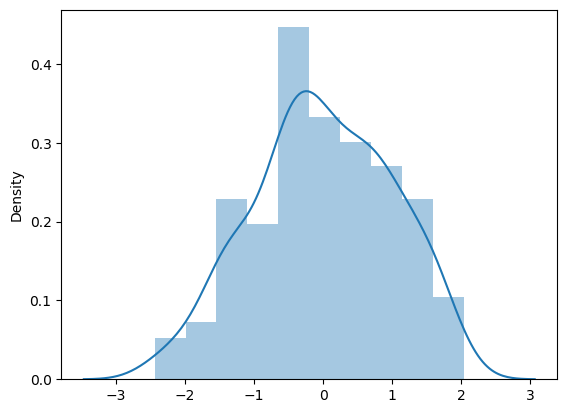

In [15]:
stdNBgraph(dataset["ssc_p"])

values = [i for i in dataset]: 
Creates a list of values from the dataset.

z_score = [(j - mean) / std for j in values]: 
Calculates the z-score for each value in the dataset using the formula (value - mean) / std.

calculates the z-score for each value in the dataset in a concise one-liner.
z_score = [(value - dataset.mean()) / dataset.std() for value in dataset